# **Causal inference with observational data**
# Difference-in-difference
* Have repeated overvations of the outcome over time? (시계열인가?)
 * yes
* Have a control time series data from a non-treated unit? (대조군이 있는가?)
 * yes
* **More than a handful of obs before and after intervention? (이벤트 전&후에 데이터 많은가?)**
 * **no**
 
$\rightarrow$ 시계열 접근 방법  
$\rightarrow$ Interrupted Time Series analysis 에서 대조군이 있고 이벤트 전후 데이터가 **적을때** 적용할 수 있는 방법 

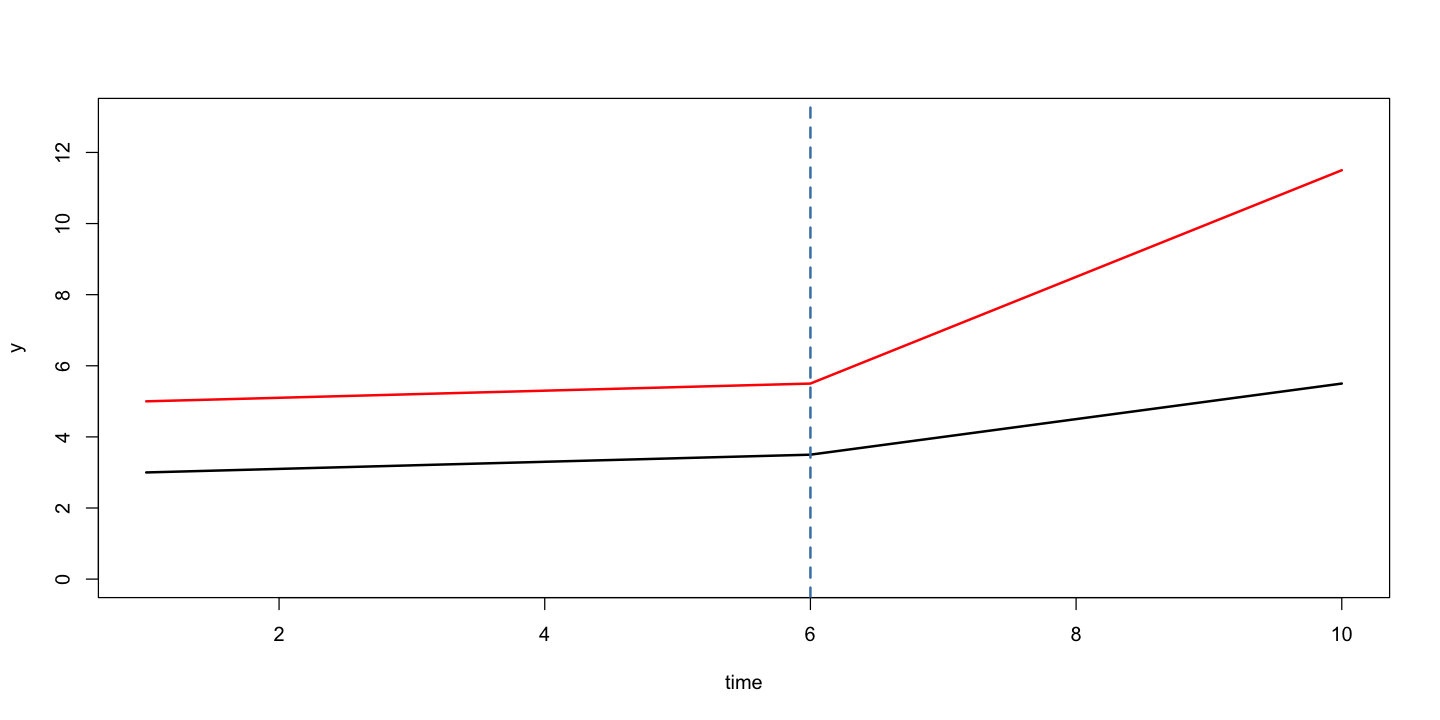

In [88]:
y1<-seq(0,0.5,by=.1)
y2<-c(1,1.5,2,2.5)
y3<-c(2,3.5,5,6.5)
options(repr.plot.width=12, repr.plot.height=6)
plot(c(y1,y2)+3,type='l',ylim=c(0,13),ylab='y',xlab='time',lwd=2)
lines(c(y1,y3)+5,col='red',lwd=2)
abline(v=6,col='steelblue',lwd=2,lty=2)

|t\s|s=2|s=1|diff|
|---|---|---|---|
|t=2|$y_{22}$|$y_{12}$|$y_{12}-y_{22}$|
|t=1|$y_{21}$|$y_{11}$|$y_{11}-y_{21}$|
|t=2|$y_{21}-y_{21}$|$y_{11}-y_{12}$|$(y_{11}-y_{21})-(y_{12}-y_{22})$|

$y_i=\beta_0 + \beta_1 x^t_i + \beta_2 x^s_i +\beta_3 x^{t\times s}_i +\varepsilon_i$